In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
#version check

print(f"Tensorflow Version {tf.__version__}")
#print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.15.0


In [4]:
pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [6]:
os.getcwd()

'/content'

In [7]:
mnist=  tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [9]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
print(f"data tyep of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data tyep of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [14]:
X_test.shape

(10000, 28, 28)

In [16]:
#Create validation dats set from Full training data
#Scale the data b/w 0 to 1 by divinding it by 255. As is unsigned data b/w 0 to 255

X_valid, X_train = X_train_full[:5000]/ 255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#sclae the test set as well
X_test = X_test / 255.

In [17]:
#Train - 55000
# Test - 10000
# VALIDATION - 500

In [18]:
len(X_train_full[5000:])

55000

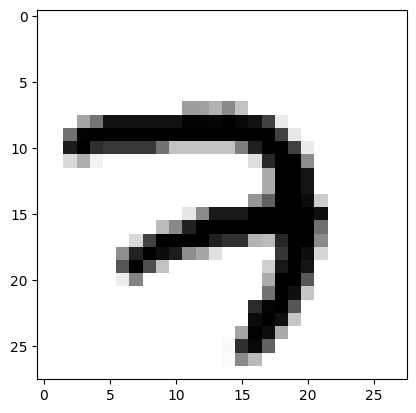

In [19]:
#Lets view some data

plt.imshow(X_train[0], cmap = "binary")
plt.show()

<Axes: >

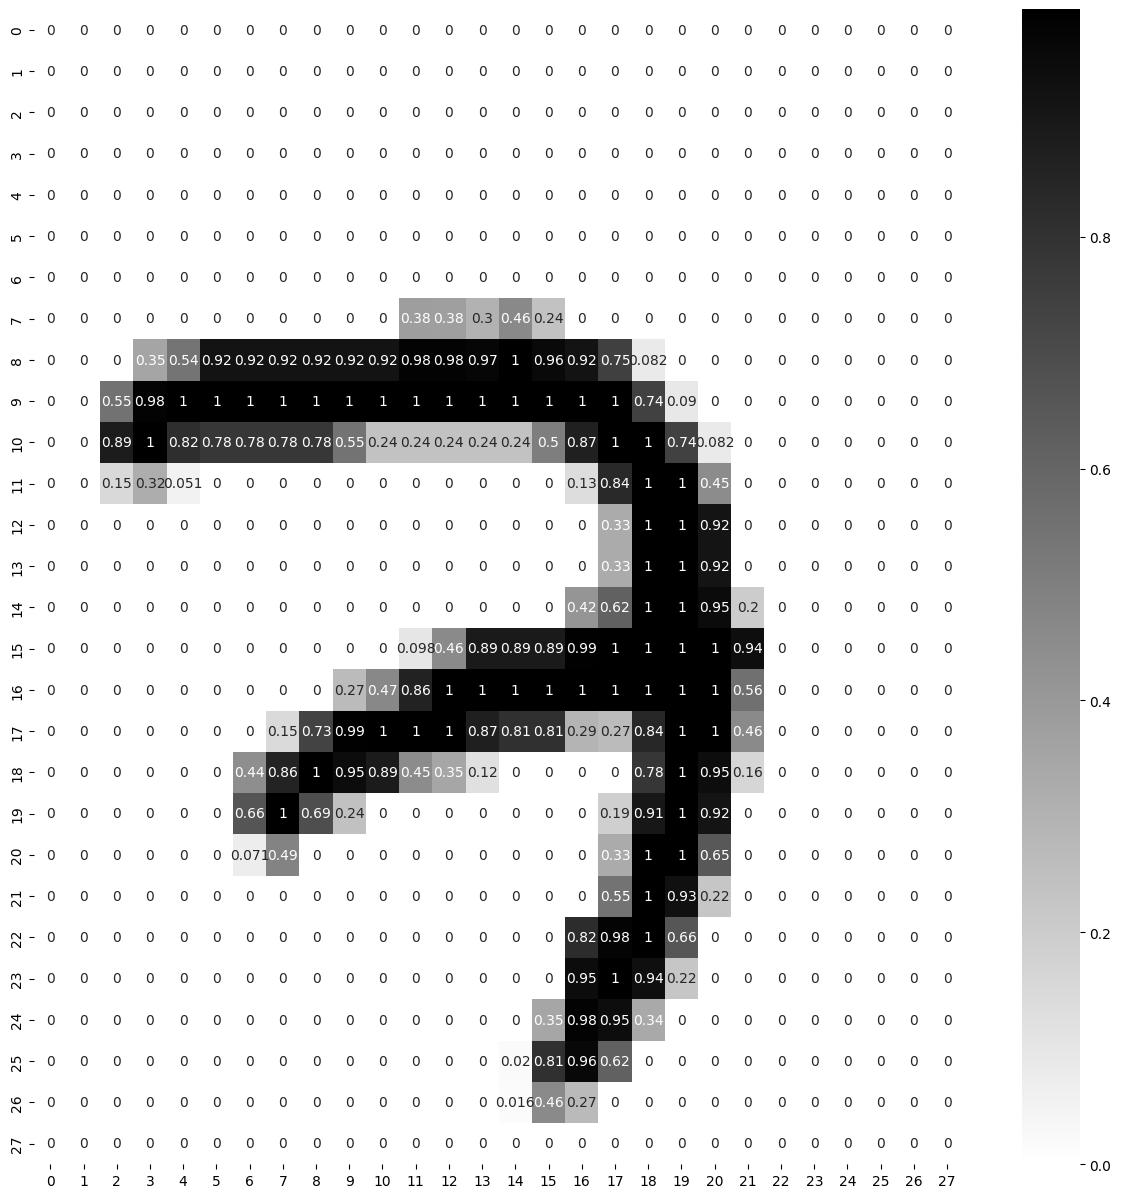

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[0], annot = True, cmap = "binary")

In [22]:
28*28

784

In [27]:
#Creating Layers of ANN

LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation ="relu",name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation ="relu",name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation ="relu",name = "hiddenLayer3")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [28]:
model_clf

In [30]:
model_clf.layers

In [31]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 hiddenLayer3 (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
784*300

235200

In [33]:
# Hence  235500= (784*300)+300
#30100: (300*100) +100


30000

In [34]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [35]:
hidden1.get_weights()[0].shape

(784, 300)

In [36]:
hidden1.get_weights()[1].shape

(300,)

In [37]:
weights, biases = hidden1.get_weights()

In [38]:
weights.shape

(784, 300)

In [40]:
print("Shape\n", weights.shape,"\n")
weights

Shape
 (784, 300) 



array([[-0.06986506, -0.0107187 , -0.05950257, ...,  0.00174759,
         0.02631391, -0.0698683 ],
       [ 0.03119888, -0.05993071, -0.02033263, ..., -0.03352852,
         0.04219867,  0.06265029],
       [-0.05168685, -0.00714929,  0.0142268 , ...,  0.06975207,
        -0.06386875, -0.07076487],
       ...,
       [ 0.04962292, -0.02269622, -0.04588497, ..., -0.0719268 ,
        -0.02885623, -0.00497688],
       [-0.06615895, -0.06139917, -0.0554873 , ..., -0.07293075,
        -0.05981765, -0.02372747],
       [ 0.02040515,  0.06493589,  0.00915899, ...,  0.02664459,
        -0.0120385 , -0.01272487]], dtype=float32)

In [41]:
print("Shape\n", biases.shape,"\n")
biases

Shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses,sparse_categorical_crossentropy

OPTIMIZER = "SGD" # os use with custom learning rate => tf.kears.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                   optimizer= OPTIMIZER,
                   metrics = METRICS
                   )

In [44]:
model_clf

In [48]:
#training
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = EPOCHS,
                    validation_data= VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 5.3426 - accuracy: 0.0963 - val_loss: 5.2803 - val_accuracy: 0.1070
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2770 - accuracy: 0.0936 - val_loss: 5.2837 - val_accuracy: 0.0868
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.3192 - accuracy: 0.0907 - val_loss: 5.2837 - val_accuracy: 0.0868
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 5.3192 - accuracy: 0.0907 - val_loss: 5.2837 - val_accuracy: 0.0868
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.3192 - accuracy: 0.0907 - val_loss: 5.2837 - val_accuracy: 0.0868
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 5.3192 - accuracy: 0.0907 - val_loss: 5.2837 - val_accuracy: 0.0868
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 5.3192 - accuracy: 0.0907 - val_loss: 5.2837 - val_accuracy

In [49]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [50]:
pd.DataFrame(history.history)


,loss,accuracy,val_loss,val_accuracy
0,5.342554,0.096309,5.280296,0.1070
1,5.276977,0.093636,5.283718,0.0868
2,5.319167,0.090673,5.283718,0.0868
3,5.319161,0.090673,5.283718,0.0868
4,5.319166,0.090673,5.283718,0.0868
5,5.319162,0.090673,5.283718,0.0868
6,5.319170,0.090673,5.283718,0.0868
7,5.319165,0.090673,5.283718,0.0868
8,5.319168,0.090673,5.283718,0.0868
9,5.319167,0.090673,5.283718,0.0868


<Axes: >

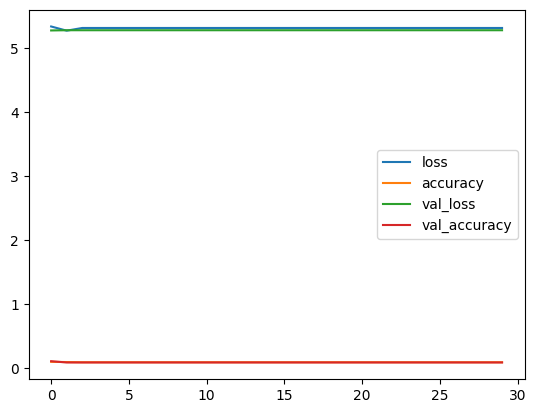

In [51]:
pd.DataFrame(history.history).plot()

In [52]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.2515 - accuracy: 0.0892


[5.251476764678955, 0.08919999748468399]

In [53]:
#SAMPLE CHECK-  TEST DATA

In [60]:
x_new = X_test[:3]

In [61]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

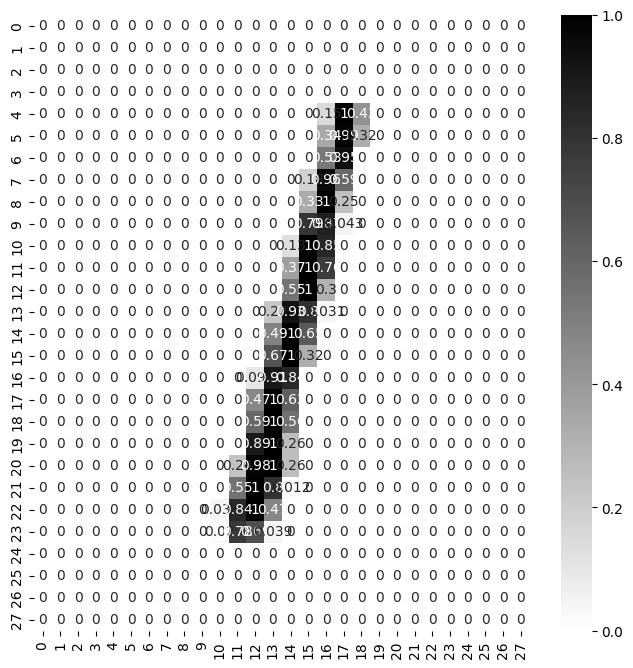

In [62]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[2], annot=True, cmap= "binary")

In [63]:
y_prob = model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 1s 803ms/step


array([[ 4.  , 11.22,  8.22,  0.  , 15.54, 35.52,  0.  ,  9.94,  6.32,
         3.66],
       [ 7.68, 16.57, 14.12,  0.  , 23.16, 55.74,  0.  , 12.93,  8.85,
         5.85],
       [ 2.32,  8.21,  6.09,  0.  , 10.32, 25.91,  0.  ,  5.82,  4.03,
         2.55]], dtype=float32)

In [65]:
y_pred = np.argmax(y_prob, axis = -1)

In [66]:
y_pred

array([5, 5, 5])

In [67]:
actual

array([7, 2, 1], dtype=uint8)

###


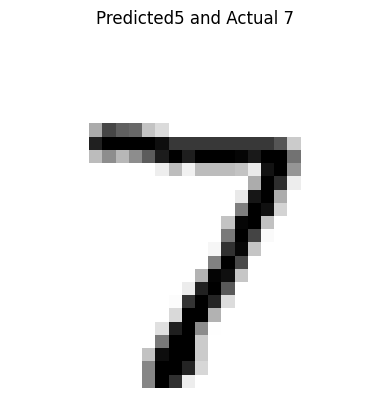

###


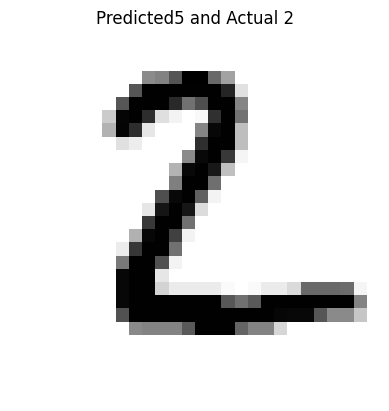

###


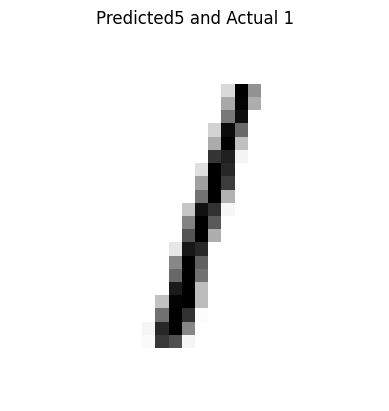

In [69]:
#plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap= "binary")
  plt.title(f"Predicted{pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show(
    print("###")
  )